In [1]:
# #import commands for first time you runnging the frondend:
# !pip install requests
# !pip install time
# !pip install schedule
# !pip install IPython
# !pip install ipywidgets
# !pip install pandas
# !pip install --upgrade matplotlib
# !pip install plotly
# !pip install numpy

In [2]:
#imports
import requests
import time
import schedule

import json
from IPython import display
import ipywidgets as widgets
from ipywidgets import Button, HBox, VBox, Label, TwoByTwoLayout, interact

import pandas as pd
import plotly.express as px

import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap

import numpy as np
import random

from datetime import datetime
from termcolor import colored
from IPython.display import HTML

In [3]:
#hiding the code
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

Dropdown Select Sensor with ID

In [10]:
#Select one Sensor:
# Example with Dropdown Box

out = widgets.Output(layout={'border': '1px solid black'})

drpdwn = widgets.Dropdown(
    options=[('5b8449037c519100190fc72c', 1), ('5d76badc953683001aa283f5', 2), ('5d76badc953683001aa283ef', 3)],
    value=1,
)

display.display(HBox([Label('PM10-Sensor ID:'), drpdwn]))

btnBoxes = widgets.Button(
    description='select sensorbox',
    disabled=False,
    button_style='info',
    tooltip='search',
    icon='check'
)
# 'success', 'info', 'warning', 'danger' or ''

display.display(btnBoxes)

def sensors_selected(button):
#     for box in drpdwn.value:
#     with out:
    out.clear_output()
    with out:
        print("selected sensorbox: " + str(drpdwn.value))
        
btnBoxes.on_click(sensors_selected)
display.display(out)

Button(button_style='info', description='select sensorbox', icon='check', style=ButtonStyle(), tooltip='search…

Output(layout=Layout(border='1px solid black'))

Button + Print Map with point of Sensor

Button(button_style='info', description='show map', icon='check', style=ButtonStyle(), tooltip='search')

Output(layout=Layout(border='1px solid black'))

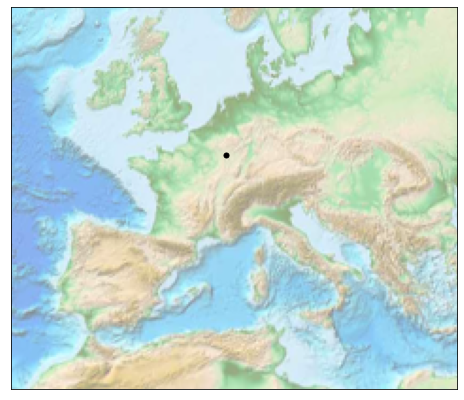

In [11]:
out = widgets.Output(layout={'border': '1px solid black'})

def plot_map(sensor_ID):
    fig = plt.figure(figsize=(8, 8))
    m = Basemap(projection='lcc', resolution=None,
                width=3.5E6, height=3E6, 
                lat_0=46.3, lon_0=6.68,)
    m.etopo(scale=0.5, alpha=0.5)

    # Map (long, lat) to (x, y) for plotting
    
    if sensor_ID == 1:
        x, y = m(7.854577, 47.993157)
        if sensor_ID == 2:
            x, y = m(7.57327, 47.55839)
            if sensor_ID == 3:
                x, y = m(7.57327, 47.55839)
    plt.plot(y, x, 'ok', markersize=5)
    

mapSens = widgets.Button(
    description='show map',
    disabled=False,
    button_style='info',
    tooltip='search',
    icon='check'
)

display.display(mapSens)

def sensors_plot(button):
#     for box in drpdwn.value:
#     with out:
    out.clear_output()
    with out:
        plot_map(drpdwn.value)
        
mapSens.on_click(sensors_plot)
display.display(out)    

# from ipyleaflet import Map
# Map(center=[34.6252978589571, -77.34580993652344], zoom=10)

Button + Consume Data from Kafka Topic + print last Hour

In [12]:
#what we need as an input is the cleaned list of measured values for the last hour and their timestamps:

last_1_hour_Measurement = pd.date_range(datetime.today(), periods=15).tolist()
last_1_hour_value_PM10 = random.sample(range(0,80), 15)

In [13]:
out = widgets.Output(layout={'border': '1px solid black'})

def plot_hist(last_1_hour_Measurement, last_1_hour_value_PM10):
    hist_data = {'lastMeasurement': last_1_hour_Measurement, 
               'value_PM10': last_1_hour_value_PM10}

    df = pd.DataFrame(hist_data, columns=['lastMeasurement', 'value_PM10'])
    fig = px.bar(df, x='lastMeasurement', y='value_PM10', color='value_PM10')
    fig.show()

mapPM10 = widgets.Button(
    description='show data PM10',
    disabled=False,
    button_style='warning',
    tooltip='search',
    icon='check'
)

display.display(mapPM10)

def valuePM10_plot(button):
#     for box in drpdwn.value:
#     with out:
    out.clear_output()
    with out:
        plot_hist(last_1_hour_Measurement, last_1_hour_value_PM10)
        
mapPM10.on_click(valuePM10_plot)
display.display(out)    

Button(button_style='warning', description='show data PM10', icon='check', style=ButtonStyle(), tooltip='searc…

Output(layout=Layout(border='1px solid black'))

Button + Print "Traffic Light" with selecting thresholds

In [8]:
#what we need as an input is the last measured value for the sensor (or the history 1 hour) (extendable: the average for an hour ???):

In [14]:
out = widgets.Output(layout={'border': '1px solid black'})

slider_target = widgets.IntSlider(min=25, max=100, step=1, value=0)
display.display(HBox([Label('Threshold_Target: '), slider_target]))

slider_allowed = widgets.IntSlider(min=(slider_target.value), max=100, step=1, value=50)
display.display(HBox([Label('Threshold_Allowed: '), slider_allowed]))


def print_warning(last_1_hour_value_PM10):
    global value
    value = sum(last_1_hour_value_PM10)/len(last_1_hour_value_PM10)
    target_value = slider_target.value
    allowed_value = slider_allowed.value

    if value < target_value:
        print(colored('Fine: The Measurement of Sensor ' + str(drpdwn.value) +  ' is under the target PM10 value', 'green'))
    if value >= target_value and value < allowed_value:
        print(colored('Warning: The Measurement of Sensor ' + str(drpdwn.value) + ' exceeds the target PM10 value but is still below the allowed-value', 'yellow'))
    if value >= allowed_value:
        print(colored('Attention: The Measurement of Sensor ' + str(drpdwn.value) + ' exceeds the allowed PM10 value', 'red')) 

#print(colored("hello red world", 'red'))


traffic_light = widgets.Button(
    description='show traffic light',
    disabled=False,
    button_style='',
    tooltip='search',
    icon='check'
)
# 'success', 'info', 'warning', 'danger' or ''

display.display(traffic_light)

def traffic_light_plot(button):
#     for box in drpdwn.value:
#     with out:
    out.clear_output()
    with out:
        print_warning(last_1_hour_value_PM10)
        print(str(value) + ' μg/m³')
        
traffic_light.on_click(traffic_light_plot)
display.display(out)

Button(description='show traffic light', icon='check', style=ButtonStyle(), tooltip='search')

Output(layout=Layout(border='1px solid black'))